<a href="https://colab.research.google.com/github/Ivysot/Alura-DataScience/blob/main/AnaliseCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

confirmed = pd.read_csv(url)
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
confirmed.shape

(289, 1147)

In [4]:
confirmedByCountry = confirmed.groupby('Country/Region').sum()
confirmedByCountry.head()

<ipython-input-4-82e86491ae44>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmedByCountry = confirmed.groupby('Country/Region').sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


#Cumulative confirmed COVID-19 cases in Brazil

Text(1120, 35000000.0, '2023')

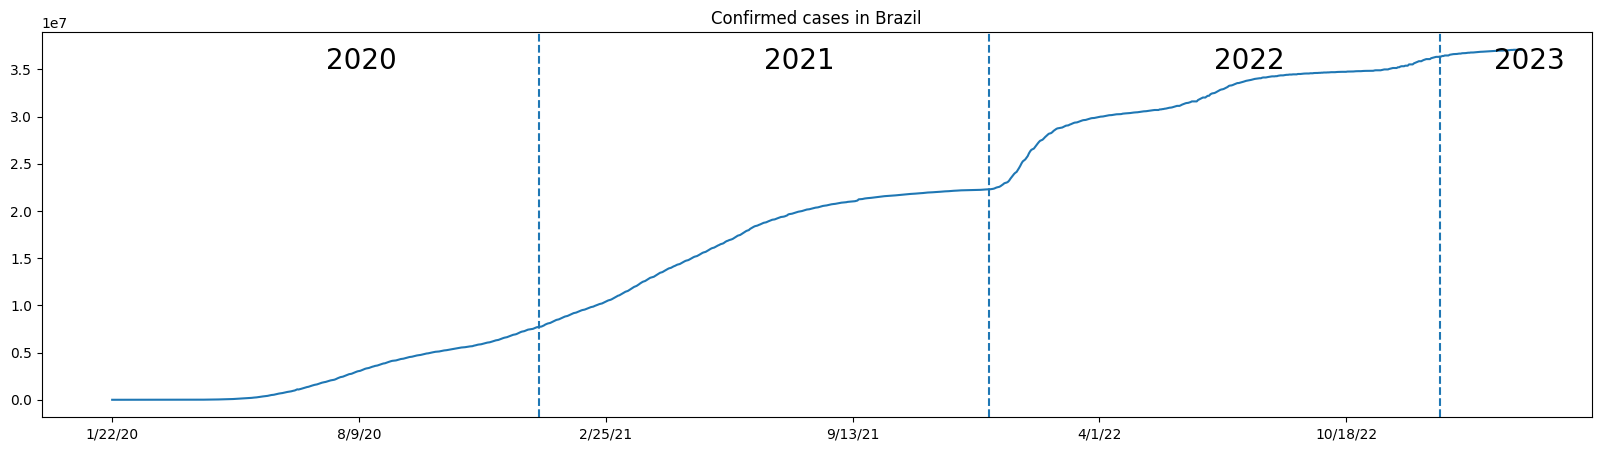

In [5]:
plt.figure(figsize=(20,5))
confirmedByCountry.loc["Brazil"][2:].plot()
plt.title("Confirmed cases in Brazil")
plt.text(173,3.5e7,"2020",fontsize=20)
plt.axvline(x = 346, linestyle = "--")
plt.text(528,3.5e7,"2021",fontsize=20)
plt.axvline(x = 711, linestyle = "--")
plt.text(893,3.5e7,"2022",fontsize=20)
plt.axvline(x = 1076, linestyle = "--")
plt.text(1120,3.5e7,"2023",fontsize=20)

In [6]:
colunas = pd.DataFrame(confirmed.columns)
lastDate = colunas.iloc[-1].values
lastDate

array(['3/9/23'], dtype=object)

##Top 10 Country Confirmed

<Figure size 1000x500 with 0 Axes>

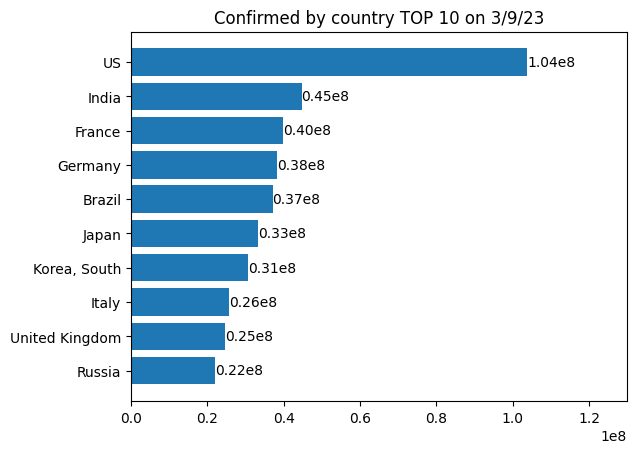

In [7]:
plt.figure(figsize=(10,5))

len(confirmed['Country/Region'])
top10Country = confirmedByCountry.iloc[:, -1].sort_values(ascending=True)[-10:]

yPos = top10Country.index

fig, ax = plt.subplots()
hbars = ax.barh(yPos, top10Country, align='center')
ax.bar_label(hbars, fmt=lambda x: f'{x / 1e8:.2f}e8' )
ax.set_xlim(0,1.3e8)

plt.title(f"Confirmed by country TOP 10 on {lastDate[0]}")
plt.show()

#Data Import(Recovered and deaths)

In [8]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Function to calculate Letality Rate

In [9]:
def latestByCountry(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

def dataByCountry(data):
  return data.groupby("Country/Region").sum()

display(latestByCountry(confirmed).head())
display(latestByCountry(deaths).head())
display(latestByCountry(recovered).head())

<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]


Country/Region
Afghanistan    209451
Albania        334457
Algeria        271496
Andorra         47890
Angola         105288
Name: 3/9/23, dtype: int64

<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]


Country/Region
Afghanistan    7896
Albania        3598
Algeria        6881
Andorra         165
Angola         1933
Name: 3/9/23, dtype: int64

<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]


Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 3/9/23, dtype: int64

In [10]:
informations = [latestByCountry(confirmed), latestByCountry(deaths), latestByCountry(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]
<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]
<ipython-input-9-e9c0440c291c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum().iloc[:,-1]


,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,209451,7896,0
Albania,334457,3598,0
Algeria,271496,6881,0
Andorra,47890,165,0
Angola,105288,1933,0


<ipython-input-9-e9c0440c291c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()
<ipython-input-9-e9c0440c291c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()


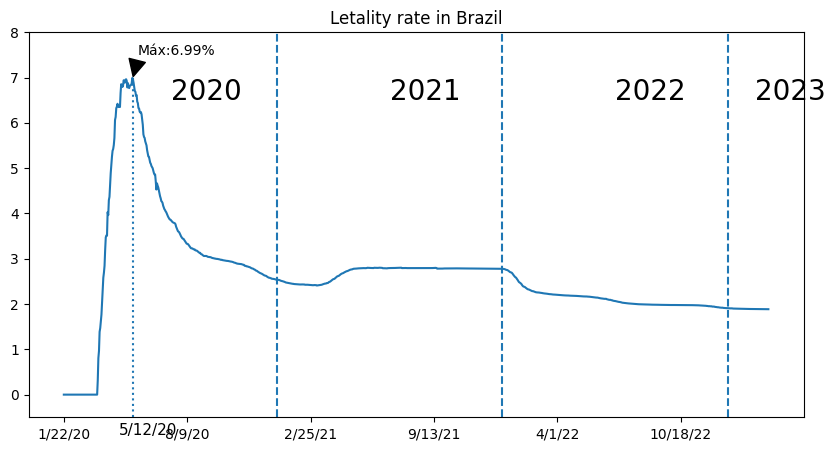

In [11]:
letalityByCountry = (dataByCountry(deaths)/dataByCountry(confirmed))*100

fig, ax = plt.subplots(figsize=(10,5))


letalityByCountry.loc["Brazil"][2:].fillna (0).plot()
ax.set_title("Letality rate in Brazil")
plt.text(173,6.5,"2020",fontsize=20)
plt.axvline(x = 346, linestyle = "--")
plt.text(528,6.5,"2021",fontsize=20)
plt.axvline(x = 711, linestyle = "--")
plt.text(893,6.5,"2022",fontsize=20)
plt.axvline(x = 1076, linestyle = "--")
plt.text(1120,6.5,"2023",fontsize=20)
plt.vlines(112,-0.5,6.99,linestyles ='dotted')
plt.text(90,-0.9,letalityByCountry.loc["Brazil"][2:].idxmax(),fontsize=11)

letalityByCountry.loc["Brazil"][2:].idxmax()
ax.annotate(f'Máx:{letalityByCountry.loc["Brazil"][2:].max():.2f}%', xy=(112, 7), xytext=(120, 7.5),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_ylim(-0.5,8)

plt.show()

<ipython-input-9-e9c0440c291c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()
<ipython-input-9-e9c0440c291c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()


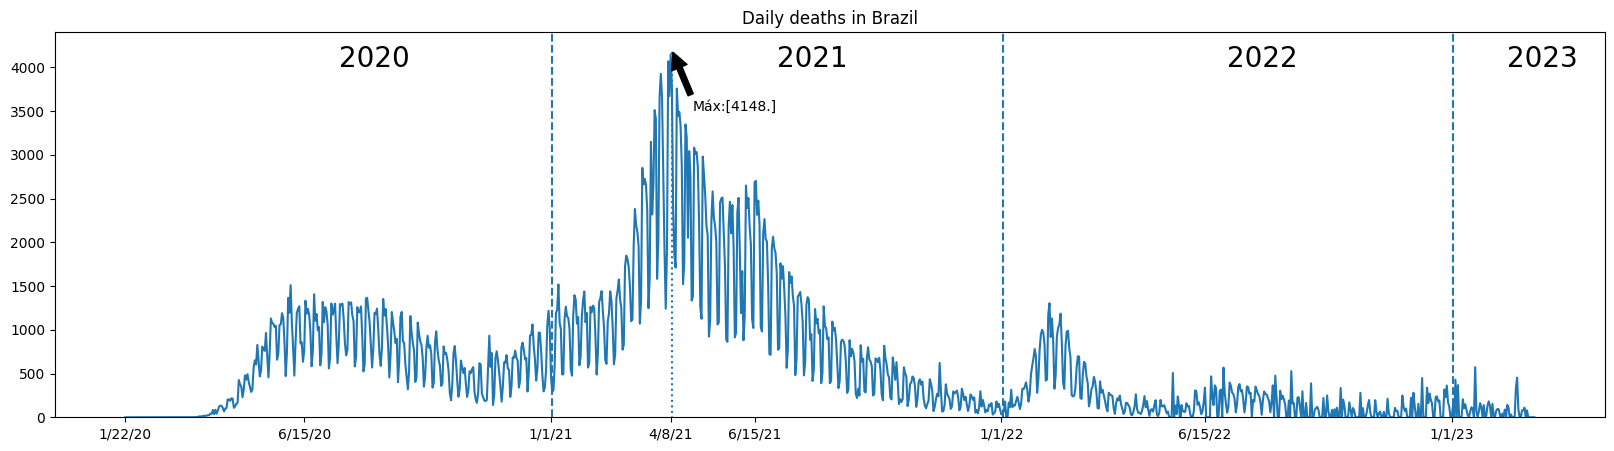

In [12]:
colAnterior = '1/22/20'
deaths2 = pd.DataFrame(dataByCountry(deaths).loc['Brazil'][2:]).transpose()
dailyDeaths = pd.DataFrame(dataByCountry(deaths).loc['Brazil'][2:]).transpose()


for col in deaths2.columns:
  dailyDeaths[col][0] = deaths2[col]-deaths2[colAnterior]

  colAnterior = col

dailyDeaths = dailyDeaths.transpose()

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(dailyDeaths)
ax.set_title("Daily deaths in Brazil")
plt.text(173,4000,"2020",fontsize=20)
plt.axvline(x = 346, linestyle = "--")
plt.text(528,4000,"2021",fontsize=20)
plt.axvline(x = 711, linestyle = "--")
plt.text(893,4000,"2022",fontsize=20)
plt.axvline(x = 1076, linestyle = "--")
plt.text(1120,4000,"2023",fontsize=20)
plt.vlines(443,-200,4200,linestyles ='dotted')

ax.annotate(f'Máx:{max(dailyDeaths.values)}', xy=(443, 4200), xytext=(460, 3500),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.set_ylim(0,4400)
plt.xticks(['1/22/20','6/15/20','1/1/21','4/8/21','6/15/21','1/1/22', '6/15/22', '1/1/23'])

plt.show()


In [13]:
dailyDeaths.idxmax().values


array(['4/8/21'], dtype=object)

<Figure size 1000x500 with 0 Axes>

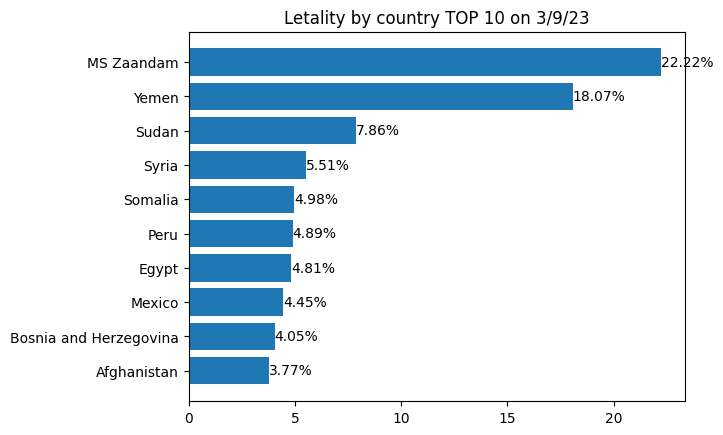

In [14]:
plt.figure(figsize=(10,5))

len(confirmed['Country/Region'])
top10CountryLetality = letalityByCountry.iloc[:, -1].sort_values(ascending=True)[-11:-1]

yPos = top10CountryLetality.index

fig, ax = plt.subplots()
hbars = ax.barh(yPos, top10CountryLetality, align='center')
ax.bar_label(hbars, fmt=lambda x: f'{x:.2f}%' )


plt.title(f"Letality by country TOP 10 on {lastDate[0]}")
plt.show()

In [15]:
letalityRate1 = combined["deaths"] / combined["confirmed"] * 100
combined["letalityRate1"] = letalityRate1
combined.head()

,confirmed,deaths,recovered,letalityRate1
Country/Region,,,,
Afghanistan,209451,7896,0,3.769855
Albania,334457,3598,0,1.075774
Algeria,271496,6881,0,2.534476
Andorra,47890,165,0,0.344540
Angola,105288,1933,0,1.835917


<Axes: xlabel='confirmed', ylabel='letalityRate1'>

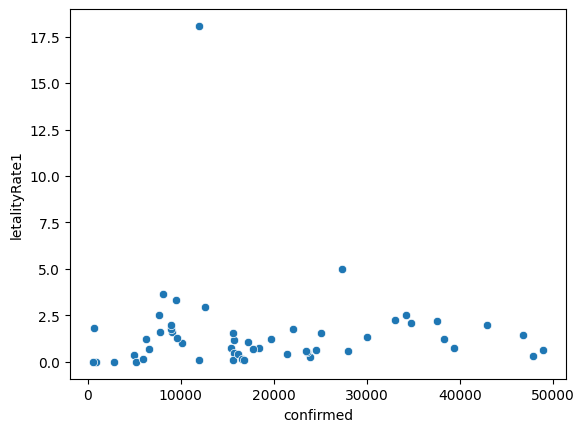

In [16]:
import seaborn as sns

sns.scatterplot(data = combined.query("confirmed > 40 and confirmed < 50000"), x="confirmed", y="letalityRate1")
